In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pesca = pd.read_csv('./data/imarpe_data_2012_2023_long.csv')

df_pesca.head()

,date,year,especie,tipo_pesca,toneladas
0,2012-01-01,2012,ANCHOVETA,industrial,17617.0
1,2012-01-01,2012,SARDINA,industrial,0.0
2,2012-01-01,2012,JUREL,industrial,0.0
3,2012-01-01,2012,CABALLA,industrial,0.0
4,2012-01-01,2012,ATUN,industrial,0.0


In [2]:
df_anchoveta = df_pesca[df_pesca['especie']=='ANCHOVETA']


In [3]:
# Agrupamos por fecha y sumamos las toneladas
df_grouped = df_anchoveta.groupby('date').agg({'toneladas': 'sum'}).reset_index()
df_grouped['date'] = pd.to_datetime(df_grouped['date'])

In [39]:
rolling_mean_toneladas = df_grouped['toneladas'].rolling(window=8).mean()


In [56]:
df_rolling = df_grouped[['date']].copy()
df_rolling['rolling_mean_toneladas'] = rolling_mean_toneladas

,date,rolling_mean_toneladas
0,2012-01-01,NaN
1,2012-01-02,NaN
2,2012-01-03,NaN
3,2012-01-04,NaN
4,2012-01-05,NaN
...,...,...
3427,2023-12-24,4717.761875
3428,2023-12-25,3853.003750
3429,2023-12-26,2288.408125
3430,2023-12-27,1200.233125


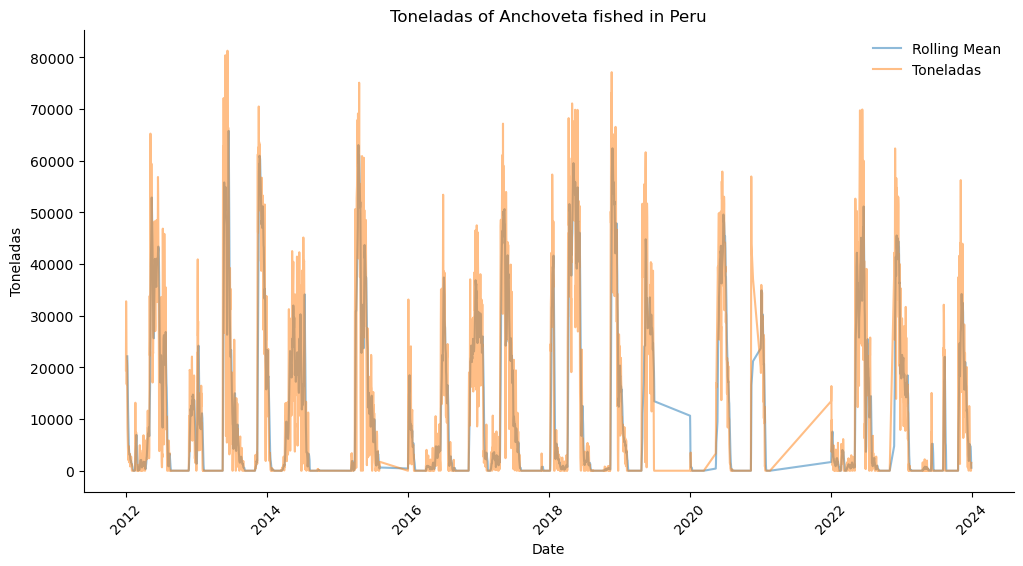

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_rolling['date'], df_rolling['rolling_mean_toneladas'], alpha=0.5, label='Rolling Mean')
ax.plot(df_grouped['date'], df_grouped['toneladas'], alpha=0.5, label='Toneladas')

ax.set_title('Toneladas of Anchoveta fished in Peru')
ax.set_xlabel('Date')
ax.set_ylabel('Toneladas')
ax.grid(False)
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.show()


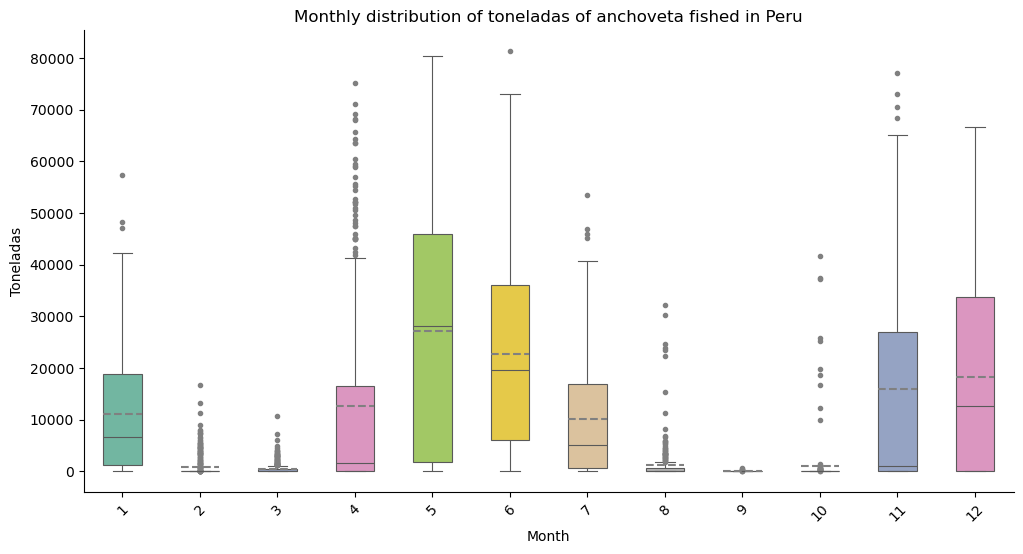

In [6]:
# Extract month from the date
df_grouped['month'] = df_grouped['date'].dt.month

# Create a boxplot with smaller outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='month', y='toneladas', data=df_grouped, ax=ax, hue='month', 
            palette="Set2", width=0.5, linewidth=0.8, showmeans=True, meanline=True, 
            meanprops={"color": "grey", "ls": "--", "lw": 1.5},
            flierprops={"marker": "o", "markersize": 3, "markerfacecolor": "grey", "markeredgecolor": "grey"})
ax.set_title('Monthly distribution of toneladas of anchoveta fished in Peru')
ax.set_xlabel('Month')
ax.set_ylabel('Toneladas')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_2521/2674083581.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_oni = pd.read_csv(url, delim_whitespace=True, skiprows=0)


(-3.0, 3.0)

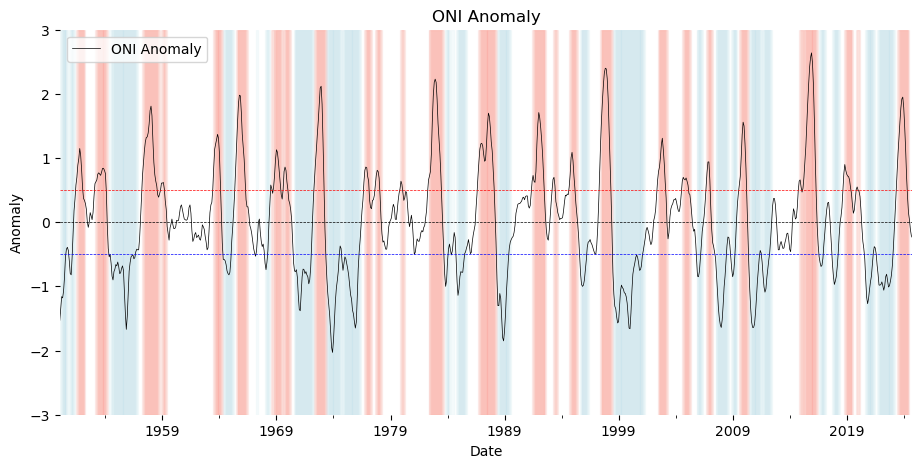

In [69]:
url = 'https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt'
df_oni = pd.read_csv(url, delim_whitespace=True, skiprows=0)
df_oni.head()
season_to_month = {
    'DJF': '01-01',
    'JFM': '02-01',
    'FMA': '03-01',
    'MAM': '04-01',
    'AMJ': '05-01',
    'MJJ': '06-01',
    'JJA': '07-01',
    'JAS': '08-01',
    'ASO': '09-01',
    'SON': '10-01',
    'OND': '11-01',
    'NDJ': '12-01'
}

df_oni['date'] = pd.to_datetime(df_oni['SEAS'].map(season_to_month) + '-' + df_oni['YR'].astype(str))

# plot the ONI anomaly over time
fig, ax = plt.subplots(figsize=(11, 5))
df_oni.plot(x='date', y='ANOM', ax=ax, label='ONI Anomaly', color='black', lw=0.5)
ax.set_title('ONI Anomaly')
ax.set_xlabel('Date')
ax.set_ylabel('Anomaly')

ax.axhline(0, color='black', linestyle='--', lw=0.5)
ax.axhline(0.5, color='red', linestyle='--', lw=0.5)
ax.axhline(-0.5, color='blue', linestyle='--', lw=0.5)

for index, row in df_oni.iterrows():
    if row['ANOM'] > 0.5:
        ax.axvspan(row['date'], row['date'] + pd.DateOffset(months=3), color='salmon', alpha=0.1)
    elif row['ANOM'] < -0.5:
        ax.axvspan(row['date'], row['date'] + pd.DateOffset(months=3), color='lightblue', alpha=0.1)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(-3, 3)
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1));

/var/folders/8j/y_l8frxs2n19mq92k5pv4y100000gn/T/ipykernel_2521/1817851457.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_rolling_monthly = df_rolling.set_index('date').resample('M').mean().reset_index()


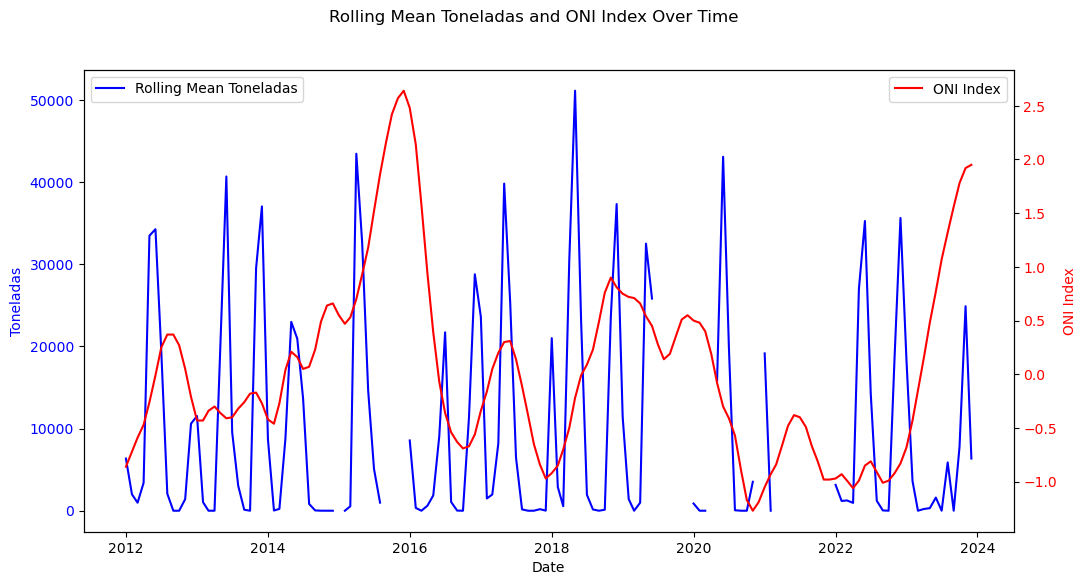

In [68]:
# Merge the two dataframes on the date column

# Ensure the date columns are in datetime format
df_oni['date'] = pd.to_datetime(df_oni['date'])

# Resample the rolling mean to monthly frequency to match the ONI data
df_rolling_monthly = df_rolling.set_index('date').resample('M').mean().reset_index()

# Adjust the date to the first day of the month
df_rolling_monthly['date'] = df_rolling_monthly['date'] + pd.offsets.MonthBegin(-1)
df_rolling_monthly['date'] = pd.to_datetime(df_rolling_monthly['date'])


# Merge the two dataframes on the date column
df_merged = pd.merge(df_rolling_monthly, df_oni, on='date', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the rolling mean of toneladas
ax1.plot(df_merged['date'], df_merged['rolling_mean_toneladas'], color='blue', label='Rolling Mean Toneladas')
ax1.set_xlabel('Date')
ax1.set_ylabel('Toneladas', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the ONI index
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['ANOM'], color='red', label='ONI Index')
ax2.set_ylabel('ONI Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
fig.suptitle('Rolling Mean Toneladas and ONI Index Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [67]:
df_rolling_monthly

,date,rolling_mean_toneladas
0,2012-01-31,6345.286458
1,2012-02-29,1996.232759
2,2012-03-31,975.447581
3,2012-04-30,3393.654167
4,2012-05-31,33462.776258
...,...,...
139,2023-08-31,5877.077789
140,2023-09-30,0.000000
141,2023-10-31,7780.381257
142,2023-11-30,24882.102443
